# Simple Linear Regression To model association relationship between No.of.ratings and subscriber_count of courses

<b> * Aim : To investigate on how does the subscriber count vary with total_ratings for a course </b>

<b> Both the features stand out as the Key Performance Indicators for a MOOC course </b> 

<b> subscriber_count = B0   +   B1 x number_of_ratings + E </b>

In [1]:
#Importing Required Modules for processing of data
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import plotly.graph_objects as go
import statsmodels.api as sm
import plotly.express as px
from scipy import stats
warnings.filterwarnings('ignore')

<b>Reading Input Data For Model Construction</b>

In [2]:
dataframe = pd.read_csv('../Dataset/Development_IT.csv')

In [3]:
#Extracting Only Numerical Features
data_numeric = dataframe[['num_subscribers','avg_rating','num_reviews','num_published_lectures','rating','num_published_practice_tests','discount_price__amount','price_detail__amount']]

#We extract the Columns under observation i.e num_subscribers , num_reviews
data_reg = data_numeric[['num_subscribers','num_reviews']]

data_reg.shape

(32751, 2)

<b>Pre-processing of data before fitting the model and outlier removal </b>

In [4]:
#Since there exist multiple courses with same num_reviews but different num_subscribers , we decide to groupby the num_reviews
#and then consider the median as the central measure


#Suppose we have 5 courses with num_reviews as 100 , but their subscriber_counts are different eg : 1000, 1250, 4000,6000,9000
#then we choose the key,value pair as <100,4000> where 4000 is the median and isn't sensitive to outlier


data_reg = data_reg.groupby('num_reviews')['num_subscribers'].mean().to_frame().reset_index().sample(1000)

print(data_reg.shape)

data_reg = data_reg[(np.abs(stats.zscore(data_reg)) < 3).all(axis=1)].sample(200) #randomly sample 500 data points

(1000, 2)


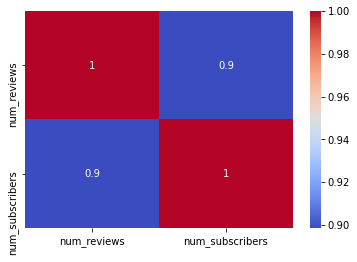

In [5]:
sns.heatmap(data_reg.corr(),annot=True,cmap='coolwarm')

A correlation plot between  the interaction variable (response and predictor)

In [6]:
data_reg.columns

Index(['num_reviews', 'num_subscribers'], dtype='object')

In [7]:
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LinearRegression

dependent = data_reg['num_subscribers'] #Target aka Response

independent = data_reg['num_reviews'].values.reshape(-1,1) #predictor

X_train, X_test, y_train, y_test = train_test_split(independent, dependent , test_size=0.3 )

lm = LinearRegression() #Model to fit

lm.fit(X_train , y_train) #Model is fit and hyperparameters are fixed

print('Coefficients: \n', lm.coef_)

Coefficients: 
 [4.75510937]


<b>We shall test the model by using predict() method </b>

<b>The test phase result is shown on the lm plot </b>

In [8]:
predictions = lm.predict(X_test)

In [1]:
fig = go.Figure([
    go.Scatter(x=X_test.squeeze(), y=y_test, name='test', mode='markers'),
    #go.Scatter(x=X_test.squeeze(), y=y_test, name='test', mode='markers'),
    go.Scatter(x=X_test.squeeze(), y=lm.predict(X_test), name='prediction')
])
fig.show()

NameError: name 'go' is not defined

In [10]:
#Residual checks , the residual is to be normally distributed and here below we have a nearly uniform distribution , 
#but not sufficently normal

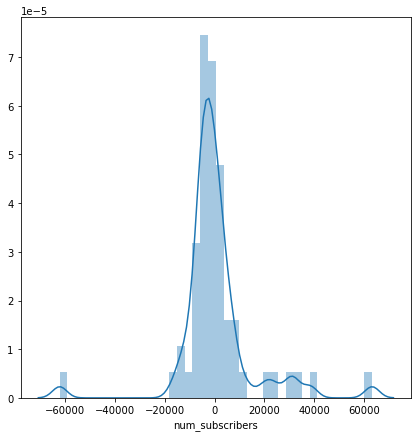

In [11]:
plt.figure(figsize=(7,7))
sns.distplot((y_test-predictions),bins=40) #residuals distribution 




((array([-2.27390067, -1.91302992, -1.70135682, -1.54640086, -1.42160977,
         -1.31571014, -1.2228056 , -1.13940346, -1.06325419, -0.99281837,
         -0.92699283, -0.86495764, -0.80608503, -0.74988229, -0.69595441,
         -0.64397882, -0.5936878 , -0.54485575, -0.49729007, -0.45082415,
         -0.40531215, -0.36062492, -0.31664678, -0.27327293, -0.23040741,
         -0.18796131, -0.14585132, -0.10399849, -0.06232713, -0.02076376,
          0.02076376,  0.06232713,  0.10399849,  0.14585132,  0.18796131,
          0.23040741,  0.27327293,  0.31664678,  0.36062492,  0.40531215,
          0.45082415,  0.49729007,  0.54485575,  0.5936878 ,  0.64397882,
          0.69595441,  0.74988229,  0.80608503,  0.86495764,  0.92699283,
          0.99281837,  1.06325419,  1.13940346,  1.2228056 ,  1.31571014,
          1.42160977,  1.54640086,  1.70135682,  1.91302992,  2.27390067]),
  array([-62179.42497425, -16136.13139545, -12771.80228814, -12299.32643729,
         -11317.76061154,  -8506.

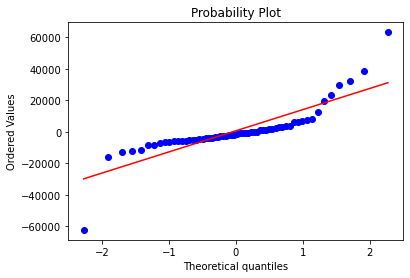

In [12]:
fig = stats.probplot(x=y_test-predictions,dist='norm',plot=plt)
fig

<b>PP plot indicates that the distribution of erros is not completely a normal distribution !
But , considering the domain of work , we really cannot neglect the tail values , because they represent the realistic data and they aren't an avoidable feature.
</b>

In [13]:
coeffecients = pd.DataFrame(lm.coef_,['Num of Reviews'])
coeffecients.columns = ['Coeffecient']
coeffecients

,Coeffecient
Num of Reviews,4.755109


<b> The co-efficent B1 is now equal to the value 4.755 above </b> 
<b> Which implies that the subscriber_count increases by the rate of 4.755 times for a single unit increase in num_reviews </b>  

Text(0.5, 1.0, 'Regression plot')

<Figure size 720x720 with 0 Axes>

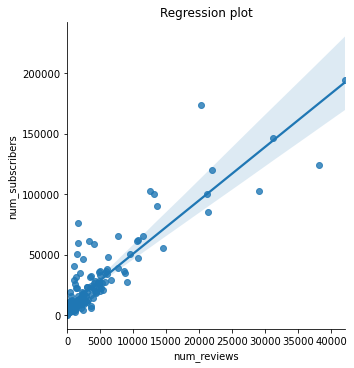

In [14]:
plt.figure(figsize=(10,10))
sns.lmplot('num_reviews','num_subscribers',data_reg)
plt.title('Regression plot')

In [15]:
#OVERALL SUMMARY CAN BE OBSERVED AND OBTAINED BY PERFROMING OLS using stats.api package

In [16]:
independent = sm.add_constant(independent)

model = sm.OLS(dependent,independent)

Reg_model = model.fit()

print(Reg_model.summary())

                            OLS Regression Results                            
Dep. Variable:        num_subscribers   R-squared:                       0.807
Model:                            OLS   Adj. R-squared:                  0.806
Method:                 Least Squares   F-statistic:                     828.3
Date:                Sun, 29 Nov 2020   Prob (F-statistic):           1.13e-72
Time:                        11:21:52   Log-Likelihood:                -2176.2
No. Observations:                 200   AIC:                             4356.
Df Residuals:                     198   BIC:                             4363.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       6632.6520   1060.313      6.255      0.0

<b> Above we have the evaluation parameters computed for the above model </b>

<b>Above value of R-square implied that 80.7% of the variation in num_subscribers is explained by the num_reviews feature</b>